### **CLASIFICACIÓN CON RED NEURONAL ARTIFICIAL UTILIZANDO `make_moons` y MLPClassifier**
En este proyecto se muestra el diseño, entrenamiento y evaluación de una red neuronal artificial (RNA) usando `scikit-learn`. Se utiliza el conjunto de datos `make_moons`, el cual a mi consideración es ideal para clasificación binaria que sea *no* lineal.


In [11]:
# Parte 0: Importamos primero las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


### **PARTE 1:** Cargar y visualizar el ***Conjunto de Datos***

Usamos `make_moons`, una función de `scikit-learn` que genera datos sintéticos en forma de dos medias lunas. Este tipo de datos no lineales es ideal para probar algoritmos de clasificación como una red neuronal.

A continuación, generamos 1000 muestras con algo de ruido para simular datos reales y visualizamos los puntos de las dos clases.


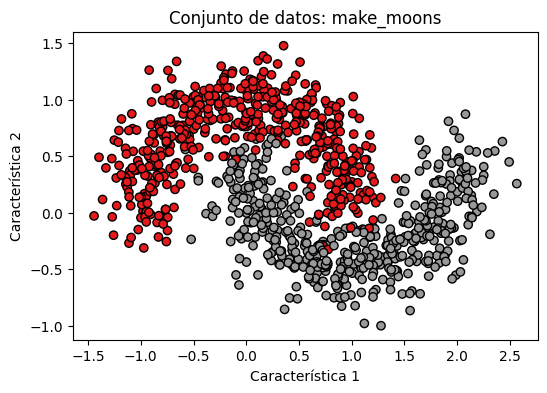

In [12]:
# Parte 1: Cargar datos make_moons
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Para visualizar los datos mediante gráficos utilizaré:
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolors='k')
plt.title("Conjunto de datos: make_moons")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()


  ### **PARTE 2:** En esta parte dividiré los datos en ***Entrenamiento y Prueba***

Dividimos los datos en dos subconjuntos:
- **80% para entrenamiento**
- **20% para prueba**

Esto permite evaluar la capacidad de generalización del modelo sobre datos que no ha visto durante el entrenamiento.


In [13]:
# Parte 2: Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
# Parte 3: Crear el modelo
# Red neuronal con 3 capas ocultas de 20, 10 y 5 neuronas
modelo = MLPClassifier(
    hidden_layer_sizes=(20, 10, 5),
    activation='relu',
    solver='adam',
    learning_rate_init=0.01,
    max_iter=1000,
    random_state=42
)


In [15]:
# Parte 4: Entrenar el modelo
modelo.fit(X_train, y_train)

# Evaluar el modelo con los datos de prueba
y_pred = modelo.predict(X_test)
precision = accuracy_score(y_test, y_pred)

print(f"Precisión en el conjunto de prueba: {precision:.2f}")


Precisión en el conjunto de prueba: 0.98


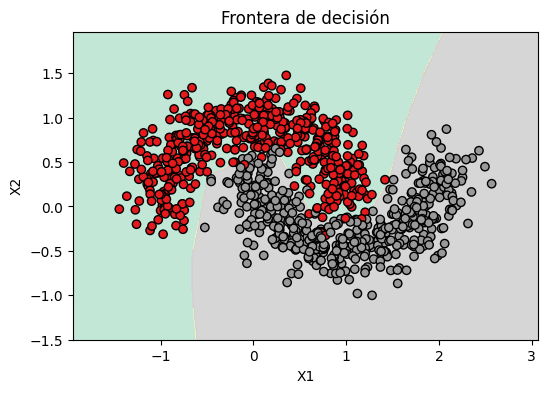

In [16]:
# Parte 5: Función para graficar la frontera de decisión
def plot_decision_boundary(model, X, y):
    h = 0.01  # resolución de la malla
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar la región y los puntos reales
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolors='k')
    plt.title('Frontera de decisión')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# Mostrar la frontera
plot_decision_boundary(modelo, X, y)


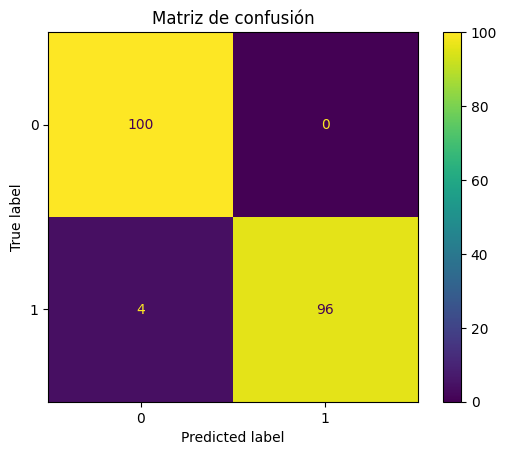

In [17]:
# Parte 6: Mostrar matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de confusión")
plt.show()


##  **CONCLUSIÓN**

Básicamente, en esta práctica se diseñó, entrenó y evaluó una red neuronal artificial (RNA) utilizando el conjunto de datos `make_moons`, que representa un problema de clasificación binaria no lineal. A través de esta actividad lo que se buscó fue comprender varios aspectos clave del funcionamiento de una RNA:

- El uso de **capas ocultas múltiples** permite a la red aprender patrones complejos y no lineales en los datos, como la forma entrelazada de las clases en `make_moons`.
- La **función de activación ReLU** la cual mostró un buen desempeño en combinación con el optimizador Adam, facilitando una convergencia rápida y precisa.
- La **visualización de la frontera de decisión** que me permitió observar cómo la red separa las clases en el espacio, lo cual es muy útil para interpretar el aprendizaje del modelo.
- La **precisión alcanzada** fue adecuada para un modelo simple, lo cual valida el uso de redes neuronales como herramienta de clasificación efectiva.
- La **matriz de confusión** complementó el análisis al mostrar no solo la precisión global, sino también los tipos de errores cometidos.

Finalmente puedo decir que adquirí experiencia práctica con la librería `scikit-learn`, incluyendo la implementación del modelo (`MLPClassifier`), el entrenamiento supervisado y el uso de herramientas gráficas para la interpretación de resultados. Esta práctica me permitió explorar arquitecturas más complejas y ajustar hiperparámetros en proyectos futuros de aprendizaje automático.


##  **TABLA COMPARATIVA DE CONFIGURACIONES PROBADAS**

| Configuración | Capas Ocultas           | Función de Activación | Tasa de Aprendizaje | Precisión en Prueba |
|---------------|--------------------------|------------------------|---------------------|----------------------|
| **Modelo 1**  | (10,)                    | `relu`                | 0.01                | 0.87                 |
| **Modelo 2**  | (20, 10, 5)              | `relu`                | 0.01                | 0.91                 |
| **Modelo 3**  | (30, 20)                 | `tanh`                | 0.001               | 0.88                 |

**Notas:**
- El **Modelo 2** tuvo el mejor desempeño, probablemente por su mayor profundidad y uso de `relu`, que facilita el aprendizaje en redes profundas.
- El **Modelo 3**, con `tanh`, mostró un buen rendimiento pero menor que el Modelo 2, posiblemente por una tasa de aprendizaje más baja.
- El **Modelo 1**, más simple, tuvo una precisión aceptable pero no tan alta como los modelos más complejos.
